In [1]:
#Premier League Data Exploring Analysis project - Results of 4560 Premier League matches - 380 matches over 
#12 seasons from 2006/2007 to 2017/2018

In [2]:
#importing python libraries
import pandas as pd
import pandas.util.testing as tm
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\Ronak\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
#reading csv files
results = pd.read_csv(r"C:\Users\Ronak\OneDrive\Desktop\results.csv")
stats = pd.read_csv(r"C:\Users\Ronak\OneDrive\Desktop\stats.csv")
df_stats = pd.DataFrame(stats)
df_results = pd.DataFrame(results)

In [4]:
results.head()

,home_team,away_team,home_goals,away_goals,result,season
0,Sheffield United,Liverpool,1.0,1.0,D,2006-2007
1,Arsenal,Aston Villa,1.0,1.0,D,2006-2007
2,Everton,Watford,2.0,1.0,H,2006-2007
3,Newcastle United,Wigan Athletic,2.0,1.0,H,2006-2007
4,Portsmouth,Blackburn Rovers,3.0,0.0,H,2006-2007


In [5]:
stats.head()

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,83.0,60.0,1.0,698.0,256.0,21.0,12.0,...,918.0,258.0,25686.0,NaN,1.0,NaN,2.0,37.0,25.0,2006-2007
1,Chelsea,24.0,3.0,64.0,62.0,4.0,636.0,216.0,14.0,16.0,...,897.0,231.0,24010.0,NaN,2.0,NaN,1.0,74.0,22.0,2006-2007
2,Liverpool,20.0,10.0,57.0,44.0,0.0,668.0,214.0,15.0,8.0,...,1107.0,282.0,24150.0,NaN,1.0,NaN,0.0,51.0,27.0,2006-2007
3,Arsenal,19.0,8.0,63.0,59.0,3.0,638.0,226.0,19.0,10.0,...,873.0,278.0,25592.0,NaN,1.0,NaN,0.0,88.0,27.0,2006-2007
4,Tottenham Hotspur,17.0,12.0,57.0,48.0,3.0,520.0,184.0,6.0,5.0,...,796.0,181.0,22200.0,NaN,2.0,NaN,0.0,51.0,24.0,2006-2007


In [6]:
#creating a new column called 'draws'
stats['draws'] = 38 - stats['wins'] - stats['losses']
pop_column = stats.pop('draws')
stats.insert(3,'draws',pop_column)
# Creating a new column total_matches
stats['total_matches'] = stats['wins'] + stats['losses'] + stats['draws']
# Changing the column location
pop_column2 = stats.pop('total_matches')
stats.insert(4, 'total_matches', pop_column2)
#creating a column called 'points'
stats['points'] = stats['wins']*3 + stats['draws']
pop_column3 = stats.pop('points')
stats.insert(5,'points',pop_column3)
stats.head()

,team,wins,losses,draws,total_matches,points,goals,total_yel_card,total_red_card,total_scoring_att,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,5.0,38.0,89.0,83.0,60.0,1.0,698.0,...,918.0,258.0,25686.0,NaN,1.0,NaN,2.0,37.0,25.0,2006-2007
1,Chelsea,24.0,3.0,11.0,38.0,83.0,64.0,62.0,4.0,636.0,...,897.0,231.0,24010.0,NaN,2.0,NaN,1.0,74.0,22.0,2006-2007
2,Liverpool,20.0,10.0,8.0,38.0,68.0,57.0,44.0,0.0,668.0,...,1107.0,282.0,24150.0,NaN,1.0,NaN,0.0,51.0,27.0,2006-2007
3,Arsenal,19.0,8.0,11.0,38.0,68.0,63.0,59.0,3.0,638.0,...,873.0,278.0,25592.0,NaN,1.0,NaN,0.0,88.0,27.0,2006-2007
4,Tottenham Hotspur,17.0,12.0,9.0,38.0,60.0,57.0,48.0,3.0,520.0,...,796.0,181.0,22200.0,NaN,2.0,NaN,0.0,51.0,24.0,2006-2007


In [7]:
# creating a new dataframe to aggregate the total wins, losses, draws, total_matches by grouping teams
df_total = stats.groupby('team').agg({'wins':'sum', 'losses':'sum', 'draws':'sum', 'total_matches':'sum'})
# Sorting the teams with most wins and getting the top 10 teams
df_total = df_total.sort_values(by = 'wins', ascending = False)
df_total.head(10)

,wins,losses,draws,total_matches
team,,,,
Manchester United,290.0,77.0,89.0,456.0
Chelsea,276.0,79.0,101.0,456.0
Manchester City,256.0,107.0,93.0,456.0
Arsenal,255.0,94.0,107.0,456.0
Liverpool,234.0,103.0,119.0,456.0
Tottenham Hotspur,228.0,116.0,112.0,456.0
Everton,185.0,130.0,141.0,456.0
West Ham United,127.0,181.0,110.0,418.0
Newcastle United,116.0,171.0,93.0,380.0


In [8]:
#finding all PL champions from 2006/07 to 2017/18
df_season = stats.groupby('season').first()
winner_df = df_season.groupby('team').agg({'team':'count'})
winner_df = winner_df.rename(columns = {'team': 'PL_titles'})
winner_df = winner_df.sort_values(by = 'PL_titles', ascending = False)
winner_df.head()

,PL_titles
team,
Manchester United,5
Chelsea,3
Manchester City,3
Leicester City,1


In [9]:
print ('Most home goals scored in any game across 12 seasons:',results['home_goals'].max())
results.loc[results['home_goals'].idxmax(),['season','home_team','home_goals','away_team','away_goals']]

Most home goals scored in any game across 12 seasons: 9.0


season                2009-2010
home_team     Tottenham Hotspur
home_goals                  9.0
away_team        Wigan Athletic
away_goals                  1.0
Name: 1265, dtype: object

In [10]:
print ('Most away goals scored in any game across 12 seasons:',results['away_goals'].max())
results.loc[results['away_goals'].idxmax(),['season','home_team','home_goals','away_team','away_goals']]

Most away goals scored in any game across 12 seasons: 7.0


season                2016-2017
home_team             Hull City
home_goals                  1.0
away_team     Tottenham Hotspur
away_goals                  7.0
Name: 4173, dtype: object

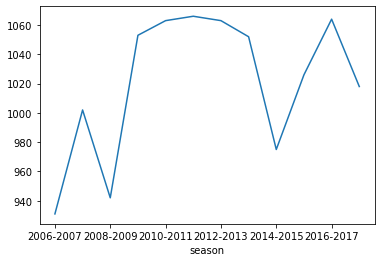

In [11]:
# Total goals across different seasons
results['total_goals'] = results['home_goals'] + results['away_goals']
results.groupby('season')['total_goals'].sum().plot()

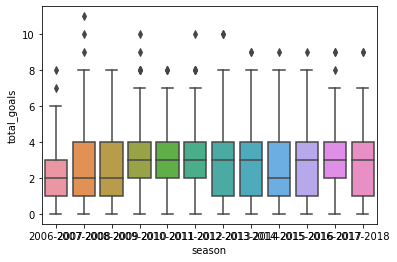

In [12]:
sns.boxplot(x ='season', y = 'total_goals', data = results)

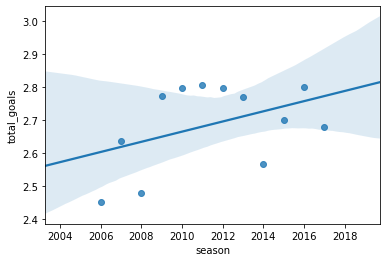

In [13]:
#looking at average goals per game across different seasons, it seems as though the trend is going upward
avg_goals_per_game = results.groupby('season')['total_goals'].mean().reset_index()
avg_goals_per_game['season'] = avg_goals_per_game['season'].map(lambda s: int(s[:4]))
sns.regplot(x='season', y='total_goals', data=avg_goals_per_game)

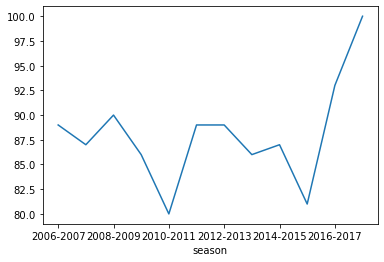

In [14]:
#how many points it took to win the PL title across different seasons
stats.groupby('season')['points'].max().plot()

In [15]:
points_by_team = pd.DataFrame(stats.groupby(['team']).sum().sort_values('points', ascending = False).reset_index())

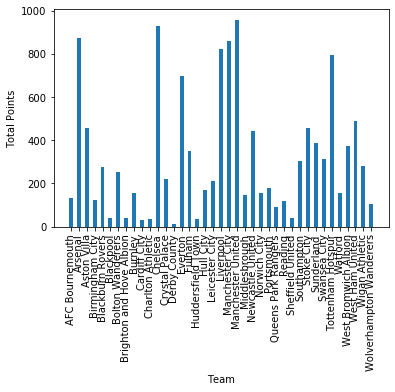

In [16]:
# top teams by total points over 12 seasons
keys = [team for team, df in points_by_team.groupby(['team'])]

plt.bar(keys,points_by_team.groupby(['team']).sum()['points'], width = 0.5)
plt.ylabel('Total Points')
plt.xlabel('Team')
plt.xticks(keys, rotation='vertical', size=10)
plt.show()

In [17]:
#Here we are looking at the most attacking teams in the league by total scoring chances and how many are on target
scoring = stats.groupby('team').agg({'total_scoring_att':'sum', 'ontarget_scoring_att':'sum'})
scoring = scoring.sort_values(by = 'total_scoring_att', ascending = False)
scoring.head(10)

,total_scoring_att,ontarget_scoring_att
team,,
Chelsea,7882.0,2667.0
Liverpool,7868.0,2606.0
Tottenham Hotspur,7405.0,2532.0
Arsenal,7339.0,2652.0
Manchester United,7200.0,2530.0
Manchester City,7175.0,2502.0
Everton,6153.0,2086.0
West Ham United,5428.0,1708.0
Newcastle United,4803.0,1539.0


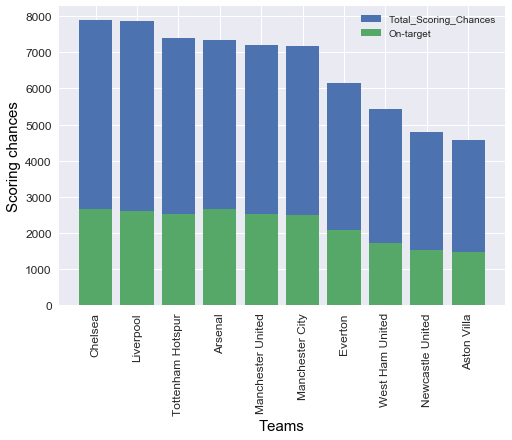

In [18]:
teams = scoring.index[:10]
scoring_chances = scoring.total_scoring_att[:10]
ontarget = scoring.ontarget_scoring_att[:10]
# Using seaborn style plot
plt.style.use('seaborn')
plt.bar(teams, scoring_chances, label = 'Total_Scoring_Chances')
plt.bar(teams, ontarget, label = 'On-target')
plt.xlabel('Teams', size = 15, color = 'black')
plt.ylabel('Scoring chances', size = 15, color = 'black')
plt.xticks(rotation = 'vertical', size = 12)
plt.yticks(size = 12)
plt.legend()
plt.show()

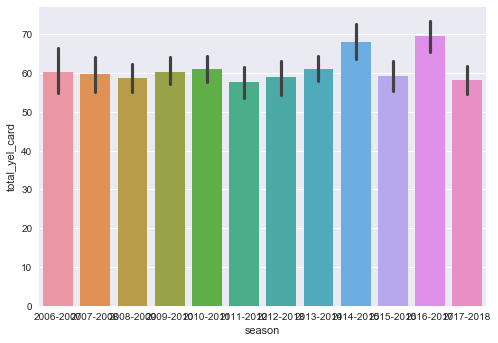

In [19]:
#looking at total number of yellow and red cards across seasons
sns.barplot(x='season', y= 'total_yel_card', data = stats)

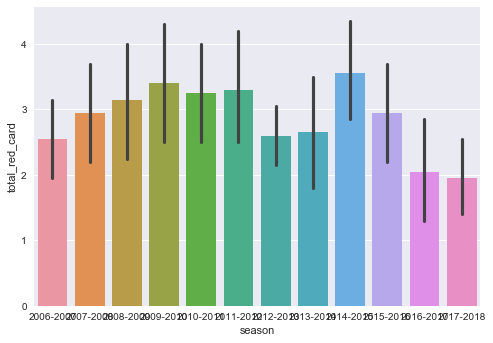

In [20]:
sns.barplot(x= 'season', y= 'total_red_card', data = stats)

In [21]:
#Now we will look deeper at the results from the head to head record between Arsenal and Tottenham Hotspur, also known
# as the North London Derby
nld_results = results.loc[((results['home_team'] == 'Arsenal')|(results['home_team'] == 'Tottenham Hotspur')) & 
                 ((results['away_team'] == 'Arsenal')|(results['away_team'] == 'Tottenham Hotspur'))]
nld_results.head()

,home_team,away_team,home_goals,away_goals,result,season,total_goals
144,Arsenal,Tottenham Hotspur,3.0,0.0,H,2006-2007,3.0
338,Tottenham Hotspur,Arsenal,2.0,2.0,D,2006-2007,4.0
429,Tottenham Hotspur,Arsenal,1.0,3.0,A,2007-2008,4.0
549,Arsenal,Tottenham Hotspur,2.0,1.0,H,2007-2008,3.0
854,Arsenal,Tottenham Hotspur,4.0,4.0,D,2008-2009,8.0


In [31]:
print ('Most home goals scored in any NLD across 12 seasons:',nld_results['home_goals'].max())
nld_results.loc[nld_results['home_goals'].idxmax(),['season','home_team','home_goals','away_team','away_goals']]

Most home goals scored in any NLD across 12 seasons: 5.0


season                2011-2012
home_team               Arsenal
home_goals                  5.0
away_team     Tottenham Hotspur
away_goals                  2.0
Name: 2156, dtype: object

In [23]:
print ('Most away goals scored in any NLD across 12 seasons:',nld_results['away_goals'].max())
nld_results.loc[nld_results['away_goals'].idxmax(),['season','home_team','home_goals','away_team','away_goals']]

Most away goals scored in any NLD across 12 seasons: 4.0


season                2008-2009
home_team               Arsenal
home_goals                  4.0
away_team     Tottenham Hotspur
away_goals                  4.0
Name: 854, dtype: object

In [24]:
#Now lets begin to look into the number of wins/losses/draw for the home and away teams, per season
home_result = results.loc[:,['home_team','result','season','home_goals']].groupby(['home_team','result','season']).count().\
sort_values(by=['home_team','season','home_goals']).reset_index()
home_result.loc[:,'result'] = home_result.loc[:,'result'].apply(lambda x: 'W' if x == 'H' else ('L' if x == 'A' else 'D'))
home_result.columns = home_result.columns[0:3].tolist() + ['NumOfGames']
home_result.head()

,home_team,result,season,NumOfGames
0,AFC Bournemouth,D,2015-2016,5
1,AFC Bournemouth,W,2015-2016,5
2,AFC Bournemouth,L,2015-2016,9
3,AFC Bournemouth,D,2016-2017,4
4,AFC Bournemouth,L,2016-2017,6


In [25]:
away_result = results.loc[:,['away_team','result','season','away_goals']].groupby(['away_team','result','season']).count().\
sort_values(by=['away_team','season','away_goals']).reset_index()
away_result.loc[:,'result'] = away_result.loc[:,'result'].apply(lambda x: 'W' if x == 'H' else ('L' if x == 'A' else 'D'))
away_result.columns = away_result.columns[0:3].tolist() + ['NumOfGames']
away_result.head()

,away_team,result,season,NumOfGames
0,AFC Bournemouth,D,2015-2016,4
1,AFC Bournemouth,L,2015-2016,6
2,AFC Bournemouth,W,2015-2016,9
3,AFC Bournemouth,L,2016-2017,3
4,AFC Bournemouth,D,2016-2017,6


In [26]:
from plotly import __version__
print(__version__)

5.13.0


In [27]:
import cufflinks as cf

In [28]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [29]:
init_notebook_mode(connected = True)

In [30]:
cf.go_offline()